In [1]:
import numpy as np
import hockey.hockey_env as h_env
import gymnasium as gym
from importlib import reload
import time

In [2]:
np.set_printoptions(suppress=True)

In [3]:
reload(h_env)

C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\RLenv.venv\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\RLenv.venv\lib\site-packages\gymnasium\envs\registration.py:642: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'hockey.hockey_env' from 'C:\\Users\\pi030\\Documents\\Uni\\ReinforcementLearning\\finalProject\\RLenv.venv\\lib\\site-packages\\hockey\\hockey_env.py'>

# Normal Game Play

In [4]:
env = h_env.HockeyEnv()

have a look at the initialization condition: alternating who starts and are random in puck position

In [5]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render()

one episode with random agents

In [6]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

Without rendering, it runs much faster

"info" dict contains useful proxy rewards and winning information

In [7]:
info, env.get_info_agent_two()

({'winner': 0,
  'reward_closeness_to_puck': -0.12005649408108868,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0},
 {'winner': 0,
  'reward_closeness_to_puck': 0.0,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': -0.0})

Winner == 0: draw

Winner == 1: you (left player)

Winner == -1: opponent wins (right player)

In [8]:
env.close()

# Train Shooting

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, t , info = env.step(np.hstack([a1,a2]))
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Train DEFENDING

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [ ]:
o, info = env.reset()
_ = env.render()

for _ in range(60):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Using discrete actions

In [ ]:
import random

In [ ]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [ ]:
env.reset()
for _ in range(251):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d or t: break

In [ ]:
env.close()

# Hand-crafted Opponent

In [9]:
env = h_env.HockeyEnv()

In [10]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [ ]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(251):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d or t: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [ ]:
np.mean(obs_buffer,axis=0)

In [ ]:
np.std(obs_buffer,axis=0)

If you want to use a fixed observation scaling, this might be a reasonable choice

In [ ]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]

In [ ]:
import pylab as plt

In [ ]:
plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

In [ ]:
plt.plot(obs_buffer[:,12])

In [ ]:
plt.plot(reward_buffer[:])

In [ ]:
np.sum(reward_buffer)

In [ ]:
info2 = env.get_info_agent_two()
info, info2, env.get_reward(info), env.get_reward_agent_two(info2)

In [12]:
env.close()

# Human Opponent

In [13]:
env = h_env.HockeyEnv()

In [56]:
player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)


Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space


In [57]:
obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: 
        winner = info['winner']
        if winner == 0:
            print("Draw")
        elif winner == 1:
            print("Player 1 won")
        else:
            print("Player 2 won")
        break

Player 1 won


In [67]:
env.close()

# Test trained agent

In [4]:
import sys
# add path to DDPG_Hockey 
sys.path.append(r"C:\Users\pi030\Documents\Uni\ReinforcementLearning\finalProject\code\RL_Project\DDPG_Hockey")
import DDPG

In [60]:
env = h_env.HockeyEnv()

In [61]:
o, info = env.reset()
#_ = env.render()
player1 = h_env.BasicOpponent(weak=True)
player2 = DDPG.DDPGOpponent()
num_games = 5

In [62]:
obs_buffer = []
reward_buffer=[]
obs2_buffer = []
winner_buffer = []
reward2_buffer=[]
playtime_buffer=[]

for game in range(num_games):
    obs, info = env.reset()
    obs_agent2 = env.obs_agent_two()
    for _ in range(500):  # only 250 steps possible because of hockeyEnv
        # env.render()
        a1 = player1.act(obs)
        a2 = player2.act(obs_agent2)
#        a1 = np.random.uniform(-1,1,4)
#        a2 = np.random.uniform(-1,1,4)    
        obs, r, d, t, info = env.step(np.hstack([a1,a2]))
        info2 = env.get_info_agent_two()
        r2 = env.get_reward_agent_two(info2)
        obs_buffer.append(obs)
        obs_agent2 = env.obs_agent_two()
        obs2_buffer.append(obs_agent2)
        reward_buffer.append(r)
        reward2_buffer.append(r2)
        if d or t:
            winner = info["winner"]
            winner_buffer.append(winner)
            playtime_buffer.append(_+1)
            print(f"length of game: {_+1} \t winner: {winner}")
            break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)
obs2_buffer = np.asarray(obs2_buffer)
reward2_buffer = np.asarray(reward2_buffer)
playtime_buffer = np.asarray(playtime_buffer)

Player 1 scored
length of game: 32 	 winner: 1
length of game: 251 	 winner: 0
Player 2 scored
length of game: 122 	 winner: -1
length of game: 251 	 winner: 0
Player 1 scored
length of game: 146 	 winner: 1
[ 32 251 122 251 146]


In [68]:
obs_buffer.shape

(802, 18)

In [41]:
np.mean(obs_buffer,axis=0)

array([-0.87227483,  0.00515588, -0.01117553,  0.48951749, -0.00489362,
        0.01610726,  0.6315184 , -2.63012047,  0.78843561, -0.72245271,
       -0.72682407,  0.09449518,  1.61326797, -0.00821911,  0.62353047,
       -0.01308001,  0.19662921,  0.        ])

In [43]:
(np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)

C:\Users\pi030\AppData\Local\Temp\ipykernel_13996\319220223.py:1: RuntimeWarning: divide by zero encountered in divide
  (np.std(obs_buffer,axis=0) - np.std(obs2_buffer,axis=0)) / np.std(obs_buffer,axis=0)


array([ 0.43766242, -0.26176401, -2.86180608,  0.07771935, -6.60287996,
       -6.7276571 , -0.77829125,  0.20745877,  0.7410538 , -0.08426865,
        0.86847089,  0.87059467,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,        -inf])

In [44]:
np.mean(winner_buffer,axis=0)

np.float64(0.3333333333333333)

In [45]:
np.std(winner_buffer,axis=0)

np.float64(0.4714045207910317)

In [46]:
np.sum(reward_buffer), np.sum(reward2_buffer)

(np.float64(10.267341055086796), np.float64(-98.86397242253372))

In [47]:
np.mean(playtime_buffer)

np.float64(178.0)

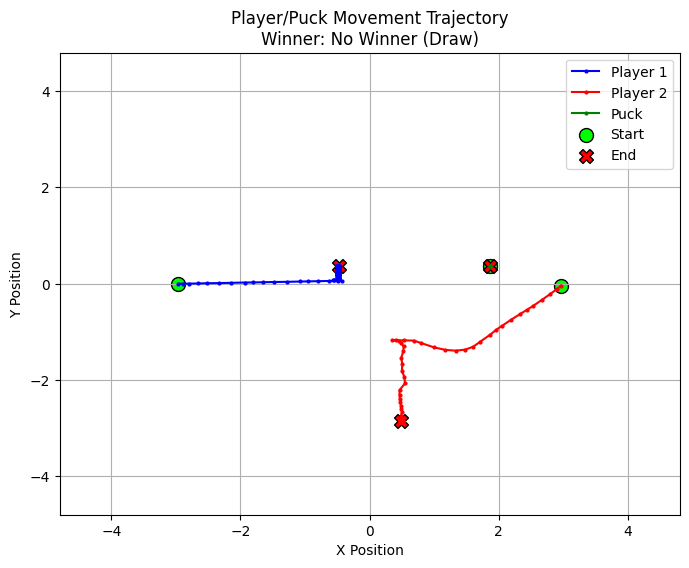

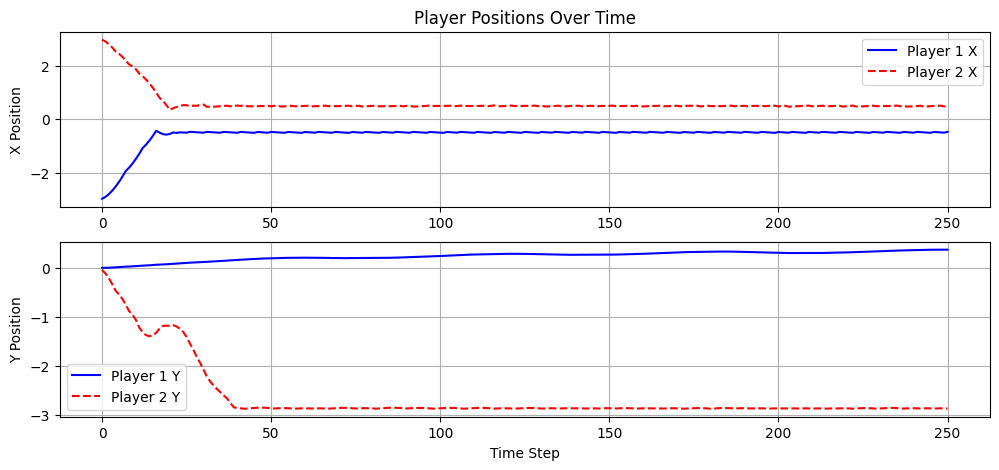

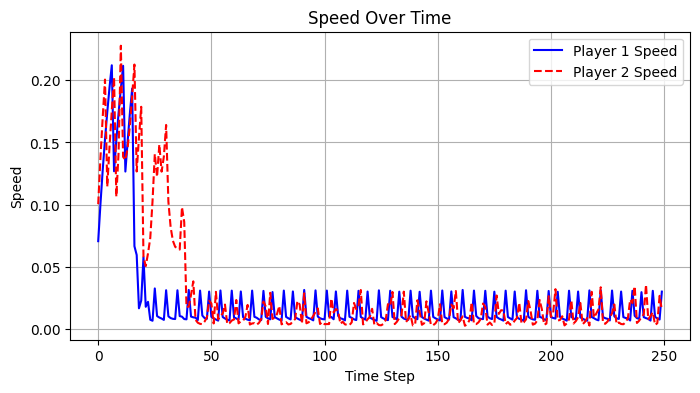

In [75]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab as plt
import matplotlib.pyplot as plt

# analyse data of one specific game (start with index/ game 1)
game_number = 4

winner = winner_buffer[game_number-1]
if winner == -1:
    winner = 2

# take observations of only that game
start_idx = sum(playtime_buffer[:game_number - 1])  # Start index (sum of previous games' steps)
end_idx = start_idx + playtime_buffer[game_number - 1]  # End index
observations = obs_buffer[start_idx:end_idx]  # Slice obs_buffer

# Extract player 1 positions
x_player1 = observations[:, 0]  # X position of player 1
y_player1 = observations[:, 1]  # Y position of player 1

# Extract player 2 positions
x_player2 = observations[:, 6]  # X position of player 2
y_player2 = observations[:, 7]  # Y position of player 2

# Extract puck data
puck_x = observations[:, 12]
puck_y = observations[:, 13]
puck_time_p1 = observations[:, 16]
puck_time_p2 = observations[:, 17]

# Compute speed for both players
dx1 = np.diff(x_player1)
dy1 = np.diff(y_player1)
speed_player1 = np.sqrt(dx1**2 + dy1**2)

dx2 = np.diff(x_player2)
dy2 = np.diff(y_player2)
speed_player2 = np.sqrt(dx2**2 + dy2**2)

# Compute speed puck
dx3 = np.diff(puck_x)
dy3 = np.diff(puck_y)
speed_puck = np.sqrt(dx3**2 + dy3**2)

# Create time axis
time_steps = np.arange(len(x_player1))  # Time steps for plotting

plt.close()
# ---- PLOT: Player & Puck Movement Trajectory ----
plt.figure(figsize=(8, 6))

# Plot movement paths
plt.plot(x_player1, y_player1, label="Player 1", color='blue', marker='o', markersize=2 , linestyle='-')
plt.plot(x_player2, y_player2, label="Player 2", color='red', marker='o', markersize=2, linestyle='-')
plt.plot(puck_x, puck_y, label="Puck", color='green', marker='o', markersize=2, linestyle='-')

# Highlight start positions (Green)
plt.scatter(x_player1[0], y_player1[0], color='lime', edgecolors='black', s=100, label="Start", marker='o')
plt.scatter(x_player2[0], y_player2[0], color='lime', edgecolors='black', s=100, marker='o')
plt.scatter(puck_x[0], puck_y[0], color='lime', edgecolors='black', s=100, marker='o')

# Highlight end positions (Red)
plt.scatter(x_player1[-1], y_player1[-1], color='red', edgecolors='black', s=100, label="End", marker='X')
plt.scatter(x_player2[-1], y_player2[-1], color='red', edgecolors='black', s=100, marker='X')
plt.scatter(puck_x[-1], puck_y[-1], color='red', edgecolors='black', s=100, marker='X')

# Labels & Formatting
plt.xlim(-4.8, 4.8) 
plt.ylim(-4.8, 4.8)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title(f"Player/Puck Movement Trajectory\nWinner: {'No Winner (Draw)' if winner == 0 else f'Player {winner}'}")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 2: X & Y Positions over time ----
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(time_steps, x_player1, label="Player 1 X", color='blue')
plt.plot(time_steps, x_player2, label="Player 2 X", color='red', linestyle='dashed')
plt.ylabel("X Position")
plt.title("Player Positions Over Time")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_steps, y_player1, label="Player 1 Y", color='blue')
plt.plot(time_steps, y_player2, label="Player 2 Y", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Y Position")
plt.legend()
plt.grid(True)
plt.show()

# ---- PLOT 3: Speed over time ----
plt.figure(figsize=(8, 4))
plt.plot(time_steps[:-1], speed_player1, label="Player 1 Speed", color='blue')
plt.plot(time_steps[:-1], speed_player2, label="Player 2 Speed", color='red', linestyle='dashed')
plt.xlabel("Time Step")
plt.ylabel("Speed")
plt.title("Speed Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
env.close()